<a href="https://colab.research.google.com/github/devmj092/RTA-notebook/blob/main/ML_Project_3_RTA_by_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Problem Statement:</h3>

The target feature is Accident_severity which is a multi-class variable. The
task is to classify this variable based on the other 31 features step-by-step by
going through each day's task. Your metric for evaluation will be f1-score

<hr>
<h3> Solution:</h3> First of all, I am going to import neccessary libraries and dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

In [2]:
from google.colab import drive
drive. mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/RTA Dataset.csv"
dataread = pd.read_csv(path)

In [4]:
dataread.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
dataread.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8116,16:40:00,Saturday,18-30,Male,High school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Turnover,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
6076,14:20:00,Saturday,Unknown,Male,NaN,NaN,NaN,NaN,Owner,1-2yr,...,Going straight,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,No distancing,Slight Injury
295,17:21:00,Thursday,31-50,Male,Junior high school,Employee,2-5yr,Pick up upto 10Q,Owner,NaN,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
1416,9:20:00,Wednesday,Over 51,Male,Elementary school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,Going straight,Passenger,Female,Under 18,3,NaN,Normal,Not a Pedestrian,No distancing,Slight Injury
9809,3:40:00,Saturday,18-30,Male,Elementary school,Owner,NaN,Pick up upto 10Q,Owner,Above 10yr,...,Going straight,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury


# EDA

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
dataread.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [8]:
dataread['Age_band_of_driver'].value_counts()

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64

In [9]:
dataread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [10]:
dataread.shape

(12316, 32)

There are:


*   12316 rows
*   32 columns

Among 32 columns 2 are int type and other are object type



In [11]:
import datetime

In [12]:
#dataread['Time'] = pd.to_datetime(dataread['Time'])

In [13]:
#dataread['hour']= dataread['Time'].dt.hour

In [14]:
#dataread.head()

In [15]:
ser=dataread['Accident_severity']
ser.unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [16]:
ser1=['Slight Injury', 'Serious Injury', 'Fatal injury']

In [17]:
dataread['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

([<matplotlib.patches.Wedge at 0x79a8b3825db0>,
 [Text(-0.9731879149499573, 0.5127429006776738, 'Slight Injury'),
  Text(0.9517381514628155, -0.5515382951800747, 'Serious Injury'),
  Text(1.0991067385120272, -0.044321296883715444, 'Fatal injury')])

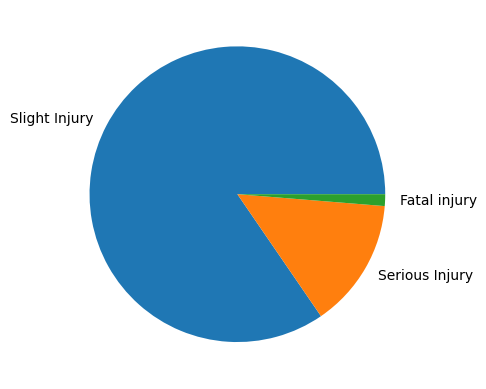

In [18]:
plt.pie(dataread['Accident_severity'].value_counts().tolist(),labels=ser1)

In [19]:
dataread.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time,12316,1074,15:30:00,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_of_week,12316,7,Friday,2041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_band_of_driver,12316,5,18-30,4271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex_of_driver,12316,3,Male,11437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Educational_level,11575,7,Junior high school,7619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_driver_relation,11737,4,Employee,9627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driving_experience,11487,7,5-10yr,3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type_of_vehicle,11366,17,Automobile,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_of_vehicle,11834,4,Owner,10459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_year_of_vehicle,8388,6,Unknown,2883,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dataread.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [21]:
dataread.duplicated().sum()

0

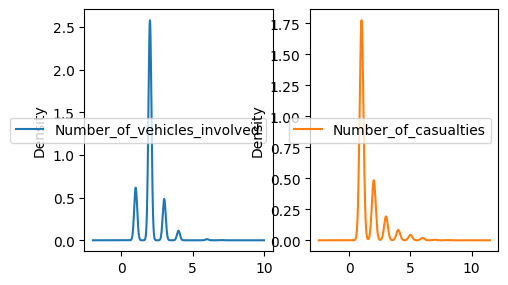

In [22]:
# Increase the layout size to (6,6)
dataread.plot(kind="density",
                subplots=True,
                layout = (6,6),
                figsize=(17,22),
                sharex=False,
                sharey=False);

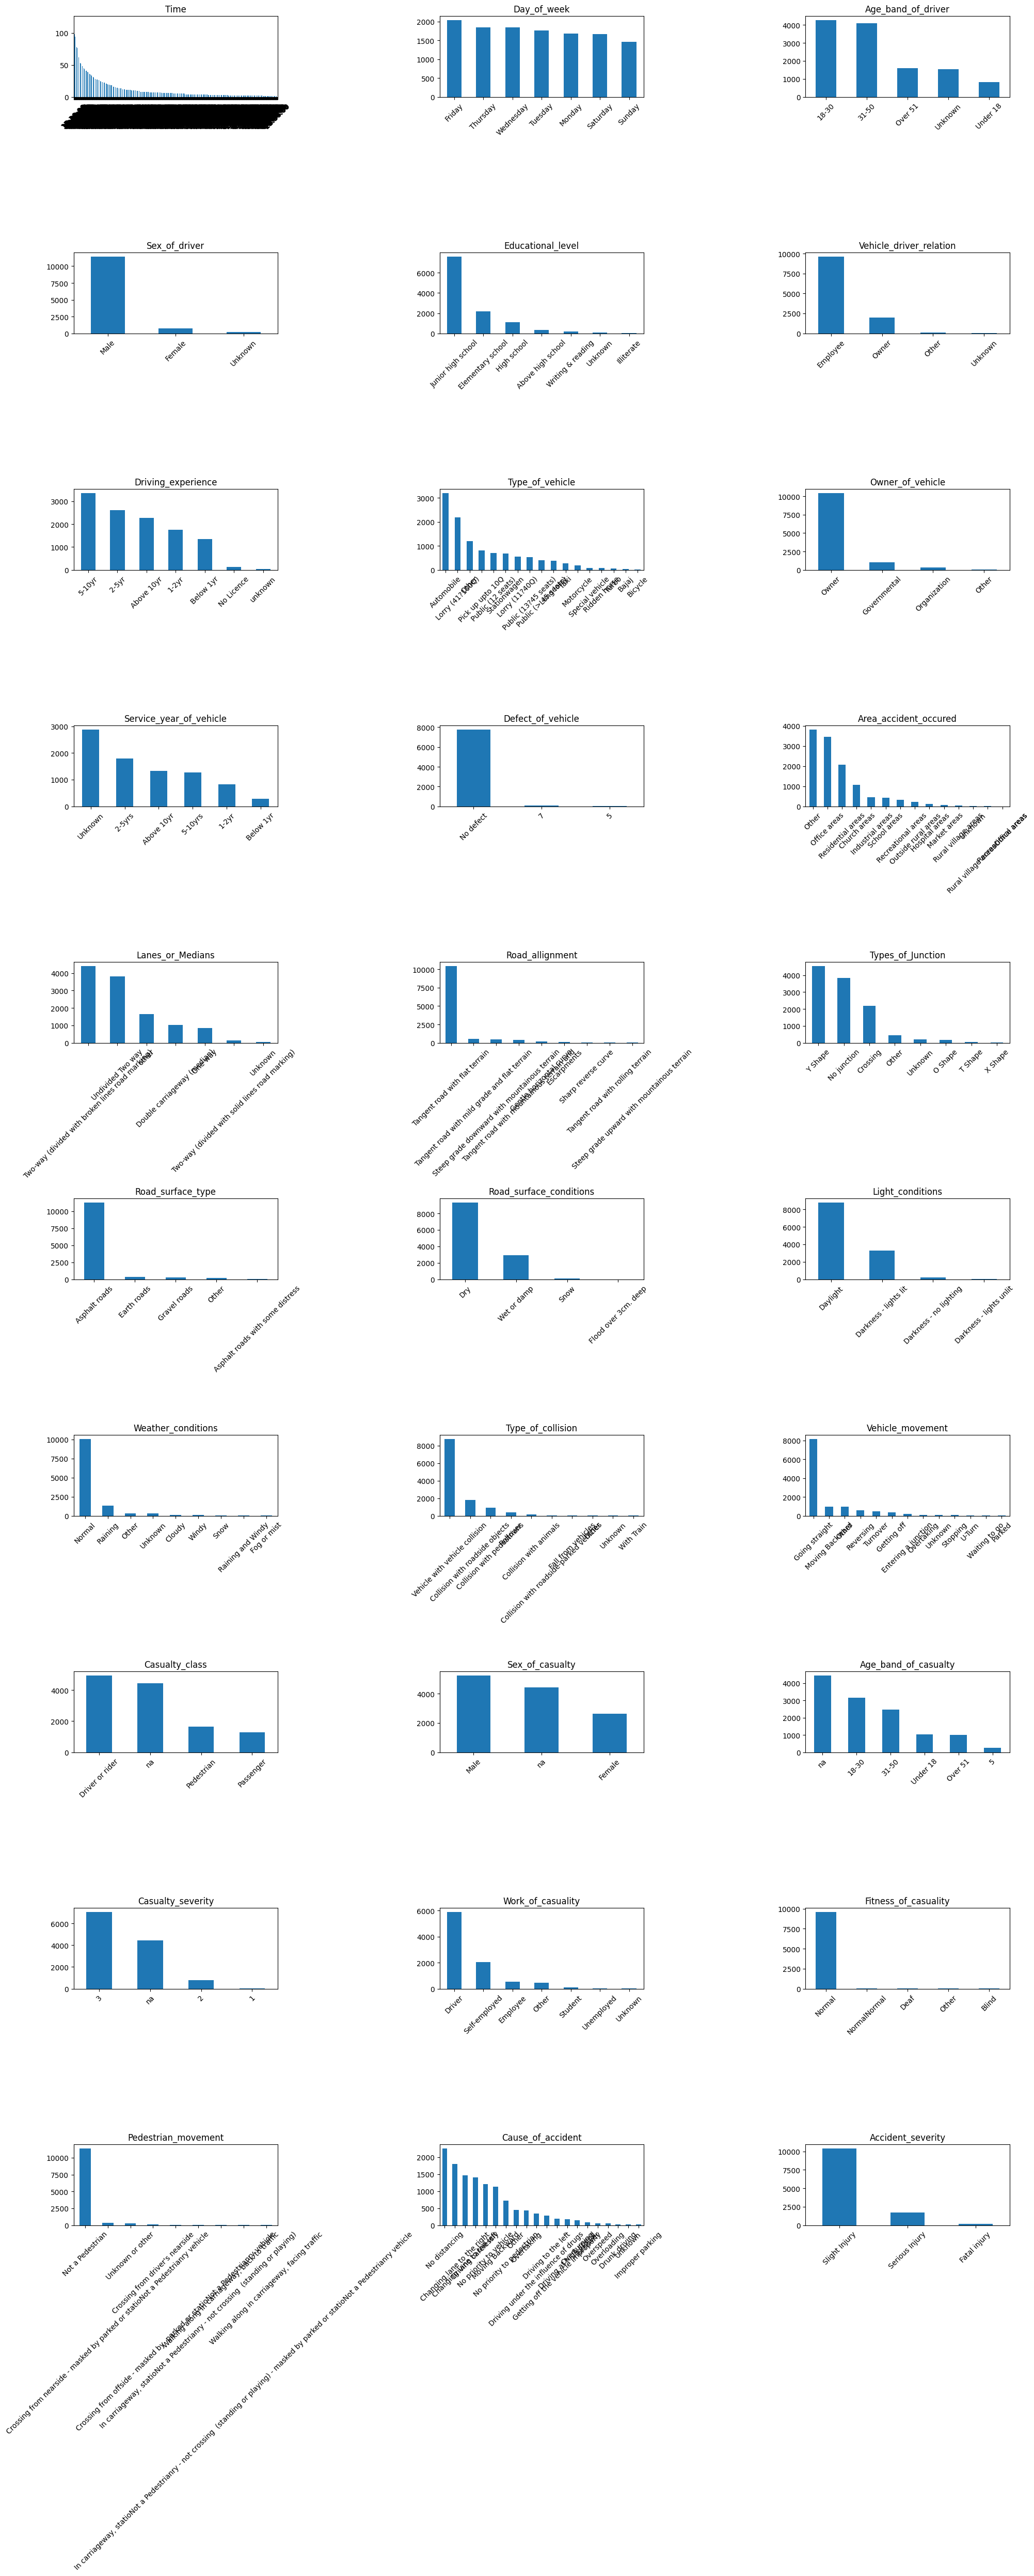

In [23]:
# Plot bar chart for each categorical column
num_columns = len(dataread.select_dtypes(include=['object']).columns)
num_rows = (num_columns + 2) // 3  # Ensure at least 3 columns per row
plt.figure(figsize=(20, 5 * num_rows))  # Increase figure height based on the number of rows
for i, column in enumerate(dataread.select_dtypes(include=['object']).columns):  # Select categorical columns
    plt.subplot(num_rows, 3, i + 1)  # Adjust subplot dimensions based on the number of columns
    dataread[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

#Preprocessing

In [24]:
#Calculating missing value percentage
missing_value_percent = (dataread.isnull().sum() / dataread.shape[0]) * 100
print(missing_value_percent)

Time                            0.000000
Day_of_week                     0.000000
Age_band_of_driver              0.000000
Sex_of_driver                   0.000000
Educational_level               6.016564
Vehicle_driver_relation         4.701202
Driving_experience              6.731082
Type_of_vehicle                 7.713543
Owner_of_vehicle                3.913608
Service_year_of_vehicle        31.893472
Defect_of_vehicle              35.945112
Area_accident_occured           1.940565
Lanes_or_Medians                3.126015
Road_allignment                 1.152972
Types_of_Junction               7.202014
Road_surface_type               1.396557
Road_surface_conditions         0.000000
Light_conditions                0.000000
Weather_conditions              0.000000
Type_of_collision               1.258525
Number_of_vehicles_involved     0.000000
Number_of_casualties            0.000000
Vehicle_movement                2.500812
Casualty_class                  0.000000
Sex_of_casualty 

In [25]:
#identifying missing value column names
missing_value_column = missing_value_percent[missing_value_percent > 17].keys()
print(missing_value_column)

Index(['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality',
       'Fitness_of_casuality'],
      dtype='object')


In [26]:
#dropping column that contain missing values
data_after = dataread.drop(columns = missing_value_column)

In [27]:
data_after.shape

(12316, 28)

In [28]:
data_after.duplicated().sum()

0

In [29]:
data_after.isnull().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [30]:
data=data_after

In [31]:
data.shape

(12316, 28)

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [33]:
from sklearn.preprocessing import LabelEncoder

Filling missing values by ffill method and transforming categorical data into numerical data via label-encoder

In [52]:
# Handle missing values
data = data.fillna(method='ffill')  # Forward fill missing values

In [53]:
data.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [54]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [51]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,420,1,0,1,0,0,0,0,3,9,7,5,1,0,0,3,2,3,2,2,2,3,2,5,3,5,9,2
1,420,1,1,1,4,0,3,11,3,6,4,5,1,0,0,3,2,8,2,2,2,3,2,5,3,5,16,2
2,420,1,0,1,4,0,0,5,3,1,6,5,1,0,0,3,2,2,2,2,2,0,1,1,2,5,0,1
3,594,3,0,1,4,0,2,11,0,6,6,6,7,2,0,0,2,8,2,2,2,2,0,0,2,5,1,2
4,594,3,0,1,4,0,1,11,3,4,6,5,7,0,0,0,2,8,2,2,2,3,2,5,3,5,16,2


In [36]:
data.duplicated().sum()

0

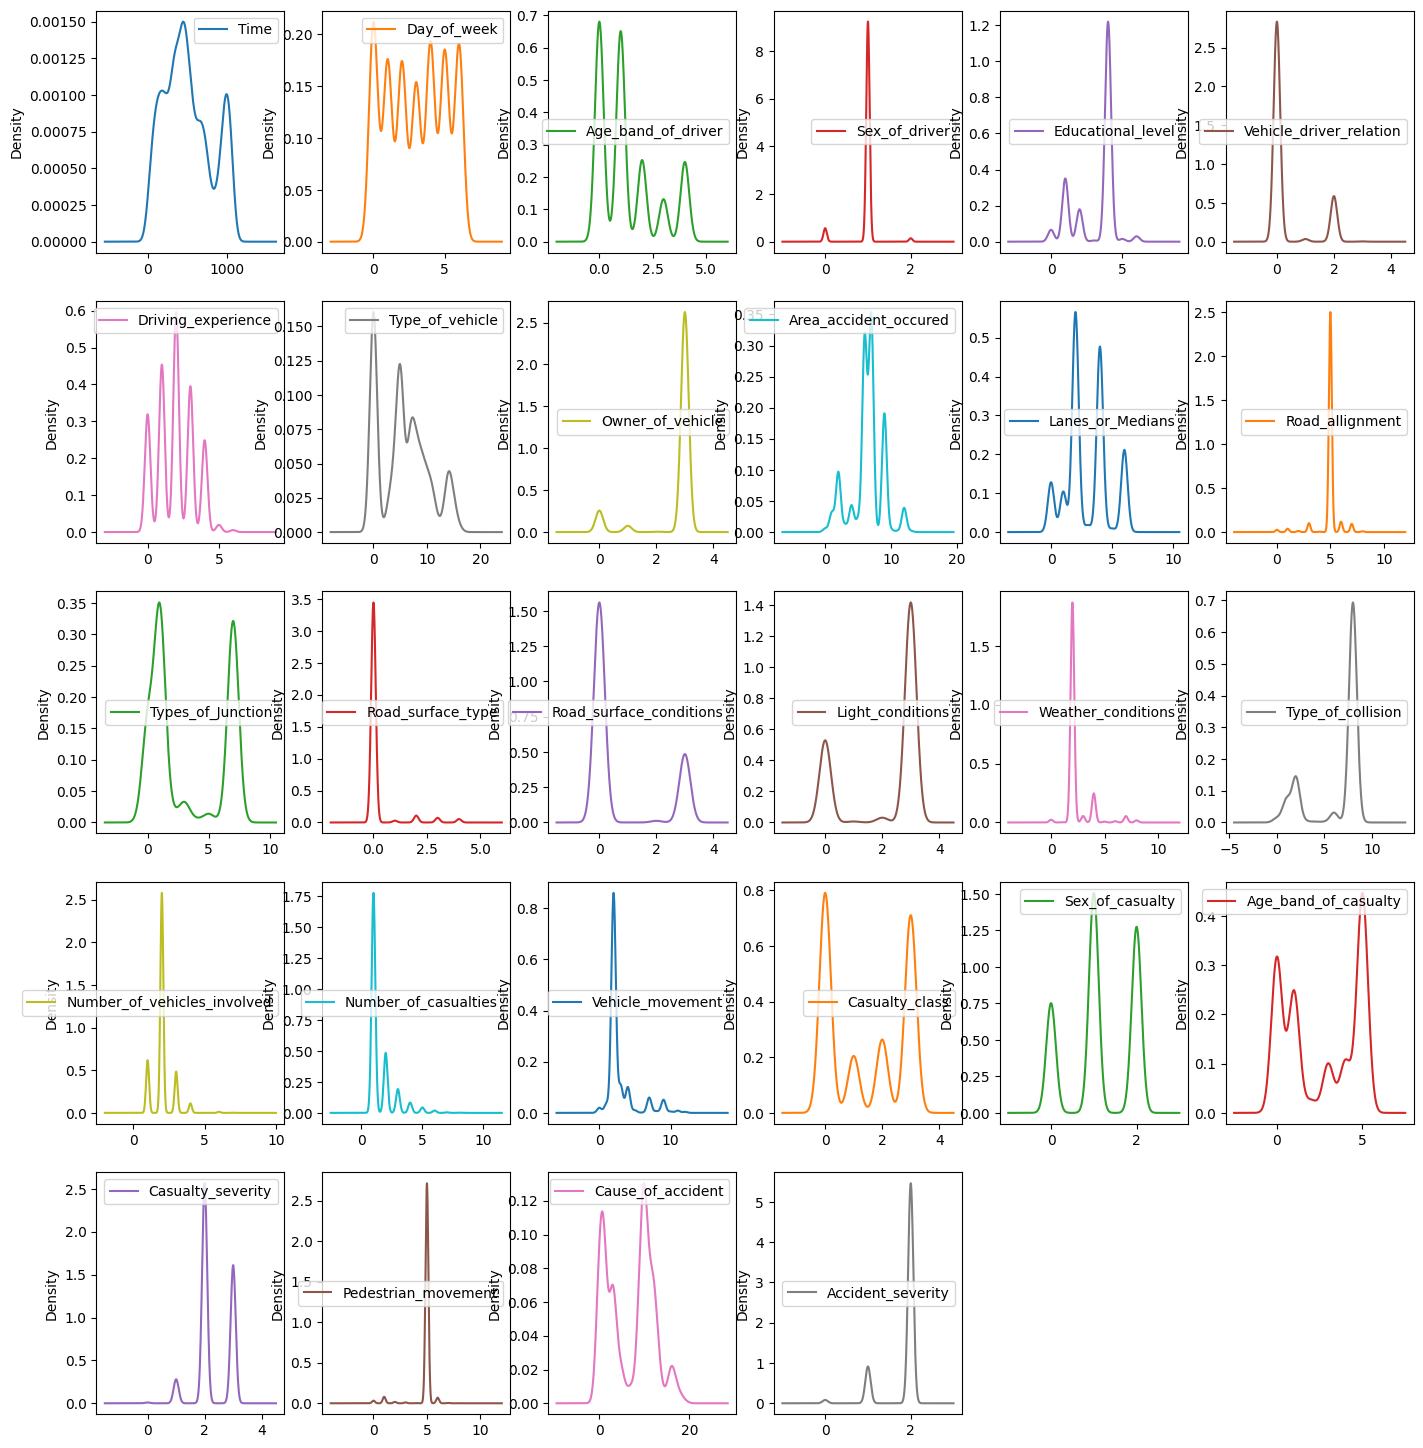

In [37]:
data.plot(kind="density",
                subplots=True,
                layout = (6,6),
                figsize=(17,22),
                sharex=False,
                sharey=False);

# Feature Selection using Selectkbest method

In [38]:
X = data.drop(columns=['Accident_severity','Time'])
y = data['Accident_severity']
k = 10  # Select top 10 features
select_k_best = SelectKBest(score_func=chi2, k=k)
X_new = select_k_best.fit_transform(X, y)


# Get the selected feature indices
selected_feature_indices = select_k_best.get_support(indices=True)

# Get the names of selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected features:")
for feature in selected_features:
    print(feature)

Selected features:
Age_band_of_driver
Vehicle_driver_relation
Driving_experience
Area_accident_occured
Road_surface_type
Light_conditions
Type_of_collision
Number_of_vehicles_involved
Number_of_casualties
Age_band_of_casualty


**As we can see Selectkbest method choosed above 10
feature for us, So i will use these features in trainning my models.**

#Baseline Modeling

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
X = data[["Age_band_of_driver","Vehicle_driver_relation","Driving_experience",
          "Area_accident_occured","Road_surface_type","Light_conditions","Type_of_collision",
          "Number_of_vehicles_involved","Number_of_casualties","Age_band_of_casualty"]]

y = data["Accident_severity"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection - Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Random forest F1 Score:", f1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#print("Classification Report:")
#print(classification_report(y_test, y_pred))

Random forest F1 Score: 0.7755336681324825
Accuracy: 0.817775974025974


In [41]:
from sklearn.tree import DecisionTreeClassifier


# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Calculate F1-score for Decision Tree model
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree F1 Score:", f1_dt)

Decision Tree F1 Score: 0.7446298023983386


In [42]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Calculate F1-score for Naive Bayes model
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes F1 Score:", f1_nb)

Naive Bayes F1 Score: 0.7569970490004264


**As we can see f1 score for randomforest is higher than other models, it means randomforet performed better than other models.**

# Hyper Parameter tunning

After baseline modeling, I used grid search CV method for hyperparameter tunning of my models.

In [43]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1_weighted')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)

# Use the best estimator
best_rf_model = grid_search.best_estimator_

# Evaluate on test data
y_pred_best = best_rf_model.predict(X_test)
f1_best = f1_score(y_test, y_pred_best, average='weighted')
print("F1 Score on Test Data (Best Model):", f1_best)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best F1 Score: 0.7905248157135782
F1 Score on Test Data (Best Model): 0.7713244982931232


Top 10 Most Important Features:
                       Feature  Importance
3        Area_accident_occured    0.185019
2           Driving_experience    0.164395
9         Age_band_of_casualty    0.119106
0           Age_band_of_driver    0.112207
7  Number_of_vehicles_involved    0.099836
6            Type_of_collision    0.090125
8         Number_of_casualties    0.084038
5             Light_conditions    0.061889
1      Vehicle_driver_relation    0.045833
4            Road_surface_type    0.037551


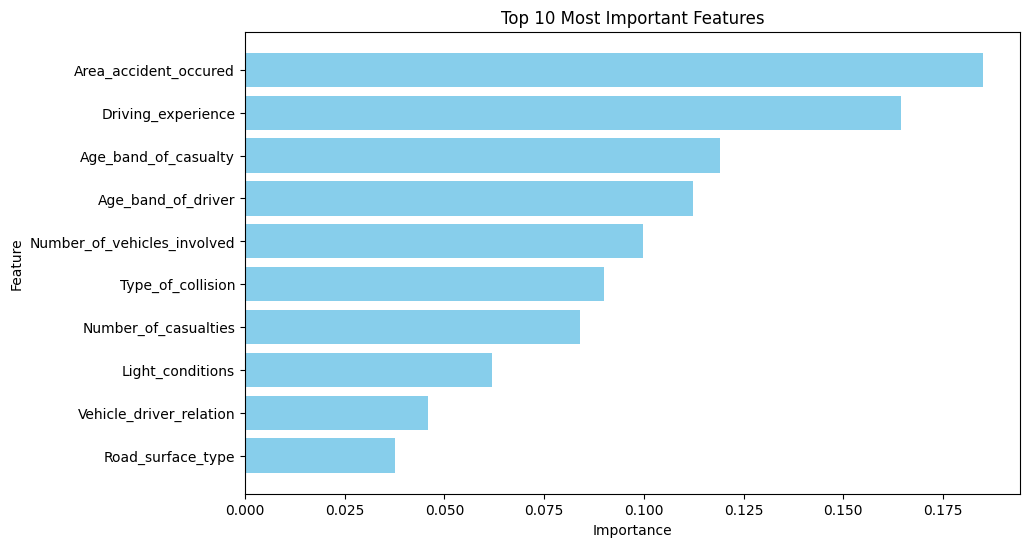

In [44]:
# Use the best estimator obtained from grid search
best_rf_model = grid_search.best_estimator_

# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


<h2><b>Key Insights</b></h2>The top 4 features stand out as having significantly higher importance than the rest:
Area accident occurred
Driving experience
Age band of casualty
Age band of driver
These features likely have the strongest influence on the model's predictions.

# Genrating Report using Evidently

# Explainable AI

In [45]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.8 MB/s eta 0:00:00


In [46]:
print(X_test.shape)
print(X_train.shape)

(2464, 10)
(9852, 10)


In [47]:
print(y_test.shape)
print(y_train.shape)

(2464,)
(9852,)


In [48]:
print(best_rf_model.predict(X_test))

[2 2 2 ... 2 2 2]


In [49]:
import shap

Shape of X_test: (2464, 10)


100%|===================| 7370/7392 [03:46<00:00]       

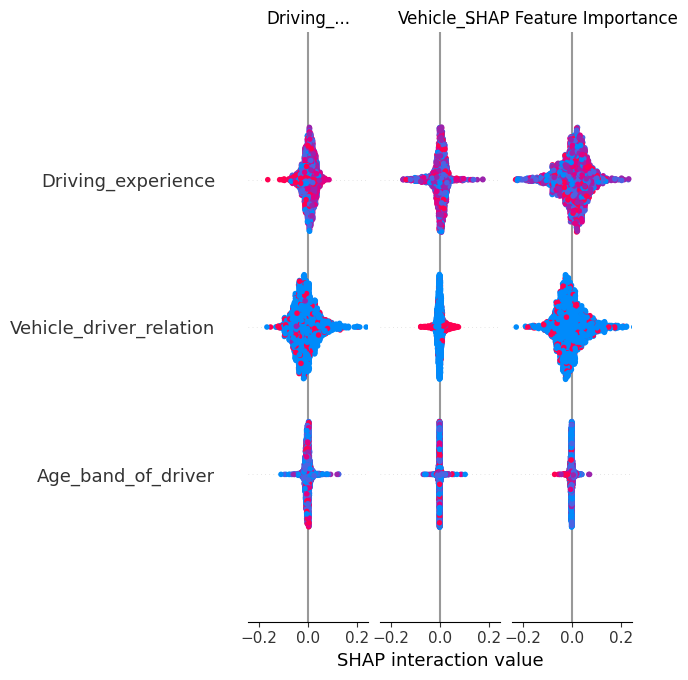

In [50]:
# Ensure feature names in X_test match the feature names used during model training
X_test = X_test[X_train.columns]

# Verify the shape of X_test
print("Shape of X_test:", X_test.shape)

# Initialize the SHAP explainer with the best Random Forest model
explainer = shap.Explainer(best_rf_model, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title('SHAP Feature Importance')
plt.show()




The features that have the biggest impact on the model's predictions are 'Driving_Experience' and 'Vehicle_SHAP'. These features have the largest spread of SHAP values on the plot, which means they can have a large positive or negative influence on the model's output.
A higher value of 'Driving_Experience' is likely to increase the model's prediction. The SHAP values for 'Driving_Experience' are mostly positive, and they are concentrated on the right side of the plot.
A higher value of 'Vehicle_SHAP' is also likely to increase the model's prediction. The SHAP values for 'Vehicle_SHAP' are also mostly positive, and they are concentrated on the right side of the plot.
